In [ ]:
%%capture output
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *

# CNS1 Defn

data = LymeData({CHRONIC, NEURO},{ADDL_CIR, DIAG_CIR, CATG},{NEURO, NON_NEURO}, defn=DEF_CNS1, drop_99=True)
data.drop_one_label(NON_NEURO) # SINGLE LABEL

print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr = ssnmf.gridsearch(param_range={'k': range(2,13),'lambda': list(np.linspace(0,1,100)), 'random_state': range(0,100)},
                                                          get_topic_accu_distr=True)

display_distr(accu_distr)

print('CNS1 Working Definition: Neuro vs Non-Neuro')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = ADDL_CIR + " "+ DIAG_CIR + " " + CATG
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)

# Total Neuro: 2569
# Total Non-Neuro: 1394

Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(878, 28)
Index(['recall a tick bite', 'length of time noticed tick bite',
       'treated with antibiotics', 'length of time treated for tick bite',
       'period of time for diagnosis', 'misdiagnosis', 'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia', 'Bio Sex', 'Antibiotics', 'Times Infected', 'GROC',
       'Bed Days', 'Mental Health Days', 'Physical Health Days', 'Disability',
       'general practitioner', 'infectious disease specialist', 'internist',
       'lyme specialist', 'other doctor', 'pediatrician', 'rheumatologist',
       'neuro'],
      dtype='object')
CNS1 Working Definition: Neuro vs Non-Neuro
best accuracy:  0.7506585612968592  best params:  {'k': 7, 'lambda': 0.6262626262626263, 'random_state': 7}
test_accuracy:  (0.6761363636363636, 18.322563839974222)


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


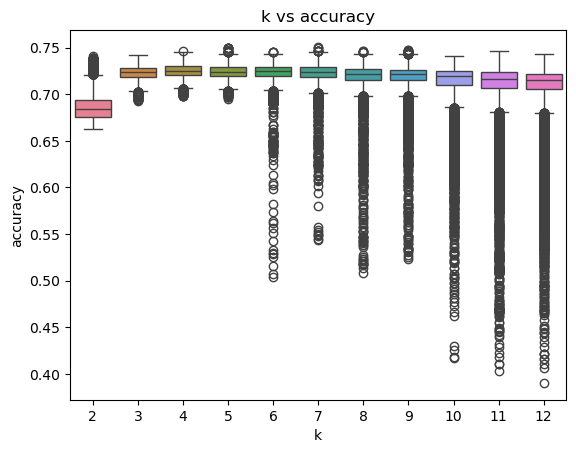

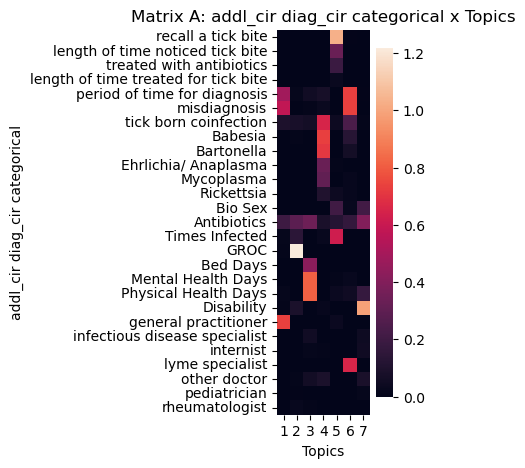

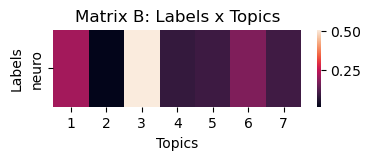

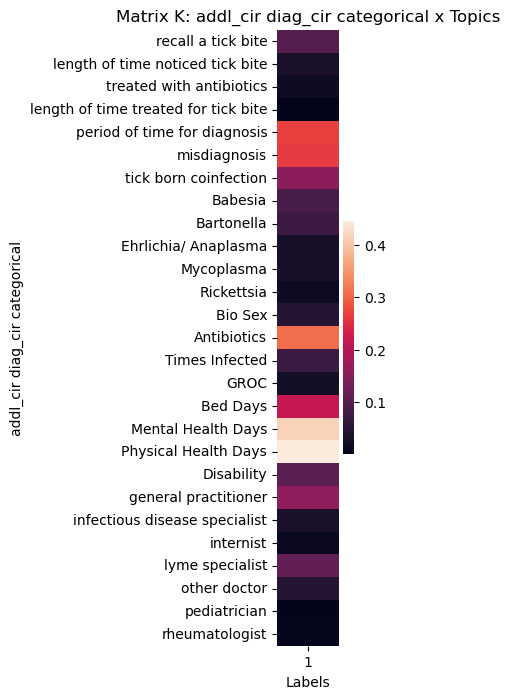

In [3]:
output.show()

In [4]:
accu_distr.to_csv('CNS1_NvN_Cr_Hs_k2-12_l1_r100.csv', index=False)

In [5]:
# Accuracy distribution statistics
mean = accu_distr.mean()
Q1 = accu_distr.quantile(0.25)
Q3 = accu_distr.quantile(0.75)
print('Mean Accuracy:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Accuracy:
2     0.686979
3     0.723253
4     0.725251
5     0.723964
6     0.723105
7     0.722020
8     0.718752
9     0.717303
10    0.711290
11    0.704754
12    0.701870
dtype: float64
IQR:
2     0.018571
3     0.010000
4     0.009970
5     0.009909
6     0.009959
7     0.011327
8     0.011388
9     0.011378
10    0.015583
11    0.017102
12    0.017031
dtype: float64
